In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
daily_activity = pd.read_csv(r'C:\Users\reide\Downloads\dailyActivity_merged.csv')
sleep = pd.read_csv(r'C:\Users\reide\Downloads\sleepDay_merged.csv')
weight = pd.read_csv(r'C:\Users\reide\Downloads\weightLogInfo_merged.csv')

In [3]:
daily_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [4]:
missing_values_daily = daily_activity.isnull().sum()

In [5]:
missing_values_daily[:]

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [6]:
daily_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [7]:
distinct_id = len(pd.unique(daily_activity["Id"]))

print("# of distinct Id: " + str(distinct_id))

# of distinct Id: 33


In [8]:
daily_activity["ActivityDate"] = pd.to_datetime(daily_activity["ActivityDate"], format = "%m/%d/%Y")

In [9]:
daily_activity["ActivityDate"].head(10)

0   2016-04-12
1   2016-04-13
2   2016-04-14
3   2016-04-15
4   2016-04-16
5   2016-04-17
6   2016-04-18
7   2016-04-19
8   2016-04-20
9   2016-04-21
Name: ActivityDate, dtype: datetime64[ns]

In [10]:
new_cols = ['Id', 'ActivityDate','DayOfTheWeek', 'TotalSteps', 'TotalDistance', 'TrackerDistance', 'LoggedActivitiesDistance', 'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes', 
            'LightlyActiveMinutes', 'SedentaryMinutes', 'TotalExerciseMinutes', 'TotalExerciseHours', 'Calories']

In [11]:
daily_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [12]:
daily_activity["DayOfTheWeek"] = daily_activity["ActivityDate"].dt.day_name()

In [13]:
daily_activity["DayOfTheWeek"].head(7)

0      Tuesday
1    Wednesday
2     Thursday
3       Friday
4     Saturday
5       Sunday
6       Monday
Name: DayOfTheWeek, dtype: object

In [14]:
daily_activity.rename(columns={"Id":"id", "ActivityDate":"date", "DayOfTheWeek":"day_of_the_week", "TotalSteps":"total_steps", 
                              "TotalDistance":"total_dist", "TrackerDistance":"track_dist", 
                              "LoggedActivitiesDistance":"logged_dist", "VeryActiveDistance":"very_active_dist", 
                              "ModeratelyActiveDistance":"moderate_active_dist", "LightActiveDistance":"light_active_dist", 
                              "SedentaryActiveDistance":"sedentary_active_dist", "VeryActiveMinutes":"very_active_mins", 
                              "FairlyActiveMinutes":"fairly_active_mins", "LightlyActiveMinutes":"lightly_active_mins", 
                              "SedentaryMinutes":"sedentary_mins", "TotalExerciseMinutes":"total_mins",
                              "TotalExerciseHours":"total_hours","Calories":"calories"}, inplace=True)

In [15]:
print(daily_activity.columns.values)

daily_activity.head()

['id' 'date' 'total_steps' 'total_dist' 'track_dist' 'logged_dist'
 'very_active_dist' 'moderate_active_dist' 'light_active_dist'
 'sedentary_active_dist' 'very_active_mins' 'fairly_active_mins'
 'lightly_active_mins' 'sedentary_mins' 'calories' 'day_of_the_week']


,id,date,total_steps,total_dist,track_dist,logged_dist,very_active_dist,moderate_active_dist,light_active_dist,sedentary_active_dist,very_active_mins,fairly_active_mins,lightly_active_mins,sedentary_mins,calories,day_of_the_week
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,Wednesday
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,Thursday
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,Friday
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,Saturday


In [16]:
daily_activity["total_mins"] = daily_activity["very_active_mins"] + daily_activity["fairly_active_mins"] + daily_activity["lightly_active_mins"] + daily_activity["sedentary_mins"]

daily_activity["total_mins"].head(5)

0    1094
1    1033
2    1440
3     998
4    1040
Name: total_mins, dtype: int64

In [17]:
daily_activity["total_hours"] = round(daily_activity["total_mins"] / 60)

daily_activity["total_hours"].head(5)

0    18.0
1    17.0
2    24.0
3    17.0
4    17.0
Name: total_hours, dtype: float64

In [18]:
daily_activity.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,940.0,4.855407e+09,2.424805e+09,1.503960e+09,2.320127e+09,4.445115e+09,6.962181e+09,8.877689e+09
total_steps,940.0,7.637911e+03,5.087151e+03,0.000000e+00,3.789750e+03,7.405500e+03,1.072700e+04,3.601900e+04
total_dist,940.0,5.489702e+00,3.924606e+00,0.000000e+00,2.620000e+00,5.245000e+00,7.712500e+00,2.803000e+01
track_dist,940.0,5.475351e+00,3.907276e+00,0.000000e+00,2.620000e+00,5.245000e+00,7.710000e+00,2.803000e+01
logged_dist,940.0,1.081709e-01,6.198965e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.942142e+00
very_active_dist,940.0,1.502681e+00,2.658941e+00,0.000000e+00,0.000000e+00,2.100000e-01,2.052500e+00,2.192000e+01
moderate_active_dist,940.0,5.675426e-01,8.835803e-01,0.000000e+00,0.000000e+00,2.400000e-01,8.000000e-01,6.480000e+00
light_active_dist,940.0,3.340819e+00,2.040655e+00,0.000000e+00,1.945000e+00,3.365000e+00,4.782500e+00,1.071000e+01
sedentary_active_dist,940.0,1.606383e-03,7.346176e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.100000e-01
very_active_mins,940.0,2.116489e+01,3.284480e+01,0.000000e+00,0.000000e+00,4.000000e+00,3.200000e+01,2.100000e+02


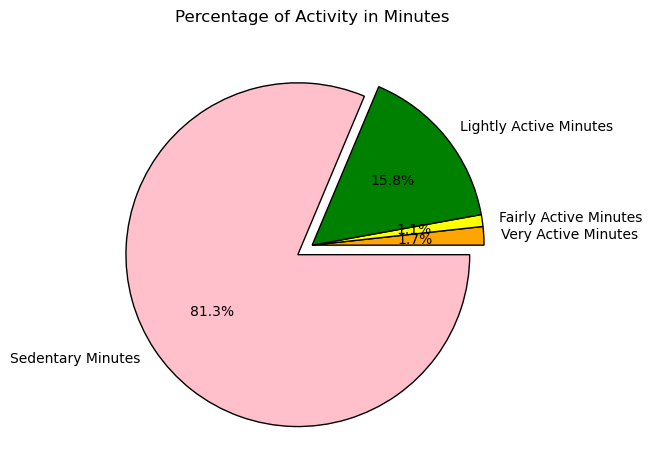

In [19]:
import matplotlib.pyplot as plt
import numpy as np


very_active_mins = daily_activity["very_active_mins"].sum()
fairly_active_mins = daily_activity["fairly_active_mins"].sum()
lightly_active_mins = daily_activity["lightly_active_mins"].sum()
sedentary_mins = daily_activity["sedentary_mins"].sum()


slices = [very_active_mins, fairly_active_mins, lightly_active_mins, sedentary_mins]
labels = ["Very Active Minutes", "Fairly Active Minutes", "Lightly Active Minutes", "Sedentary Minutes"]
colours = ["orange", "yellow", "green", "pink"]
explode = [0, 0, 0, 0.1]
plt.style.use("default")
plt.pie(slices, labels = labels, 
        colors = colours, wedgeprops = {"edgecolor": "black"}, 
        explode = explode, autopct = "%1.1f%%")
plt.title("Percentage of Activity in Minutes")
plt.tight_layout()
plt.show()

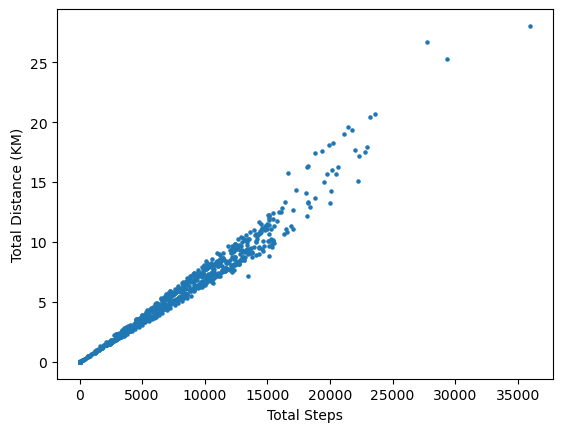

In [20]:
import matplotlib.pyplot as plt
plt.scatter(daily_activity['total_steps'], daily_activity['total_dist'], s=5, marker='o')
plt.xlabel('Total Steps')
plt.ylabel('Total Distance (KM)')
plt.show()

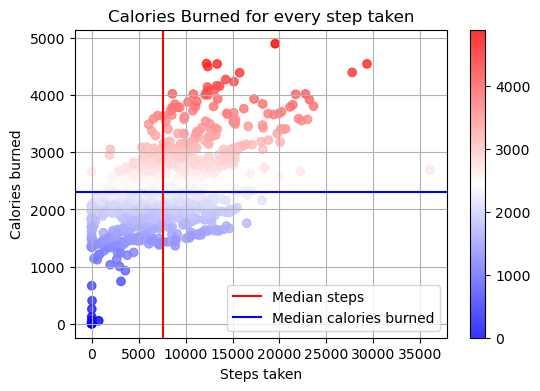

In [21]:
import matplotlib.pyplot as plt

plt.style.use("default")
plt.figure(figsize=(6, 4)) # specify size of the chart
plt.scatter(daily_activity.total_steps, daily_activity.calories, alpha = 0.8, c = daily_activity.calories, cmap = "bwr")

median_calories = 2303
median_steps = 7637
plt.colorbar(orientation = "vertical")
plt.axvline(median_steps, color = "Red", label = "Median steps")
plt.axhline(median_calories, color = "Blue", label = "Median calories burned")
plt.xlabel("Steps taken")
plt.ylabel("Calories burned")
plt.title("Calories Burned for every step taken")
plt.grid(True)
plt.legend()
plt.show()

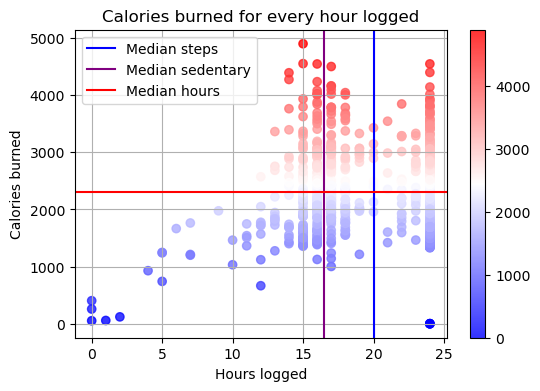

In [22]:
import matplotlib.pyplot as plt

plt.style.use("default")
plt.figure(figsize=(6,4))
plt.scatter(daily_activity.total_hours, daily_activity.calories, 
            alpha = 0.8, c = daily_activity.calories, 
            cmap = "bwr")

median_calories = 2303
median_hours = 20
median_sedentary = 991 / 60

plt.colorbar(orientation = "vertical")
plt.axvline(median_hours, color = "Blue", label = "Median steps")
plt.axvline(median_sedentary, color = "Purple", label = "Median sedentary")
plt.axhline(median_calories, color = "Red", label = "Median hours")
plt.xlabel("Hours logged")
plt.ylabel("Calories burned")
plt.title("Calories burned for every hour logged")
plt.legend()
plt.grid(True)
plt.show()

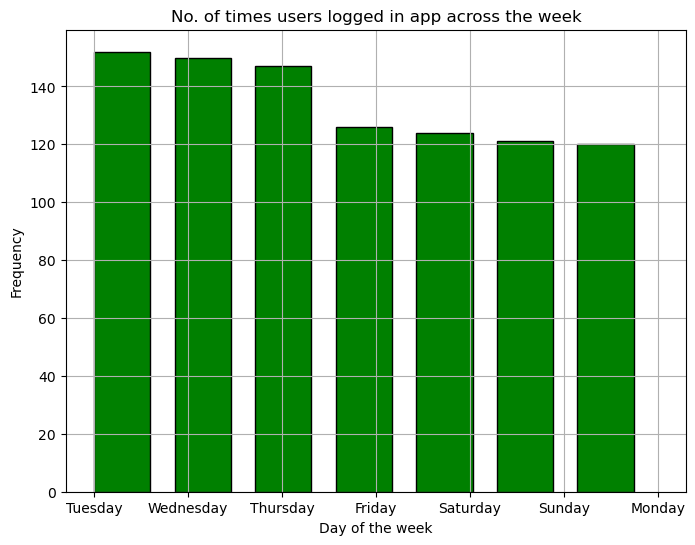

In [23]:
import matplotlib.pyplot as plt

plt.style.use("default")
plt.figure(figsize=(8,6)) # specify size of the chart
plt.hist(daily_activity.day_of_the_week, bins = 7, 
         width = 0.6, color = "green", edgecolor = "black")

plt.xlabel("Day of the week")
plt.ylabel("Frequency")
plt.title("No. of times users logged in app across the week")
plt.grid(True)
plt.show()